In [7]:
%pip install python-louvain
import os
import pandas as pd
import kagglehub
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain


Note: you may need to restart the kernel to use updated packages.


## CARICAMENTO DATASET

In [8]:
# Simulazione del download del dataset Disney da un percorso locale
path = kagglehub.dataset_download("hivamb/disney-movies-and-tv-shows")
file_path = os.path.join(path, "disney_plus_titles.csv")

# Leggere il file CSV
df = pd.read_csv(file_path)

# Mostrare le prime righe del dataset per capire la struttura
print(df.head())


KaggleApiHTTPError: 403 Client Error.

You don't have permission to access resource at URL: https://www.kaggle.com/datasets/hivamb/disney-movies-and-tv-shows
Please make sure you are authenticated if you are trying to access a private resource or a resource requiring consent.

## Creazione Grafo

In [ ]:
# Carica il dataset
df = pd.read_csv("C:\\Users\\mauro\\Desktop\\Nuova cartella\\disney_plus_titles.csv")

# Crea un grafo vuoto
G = nx.Graph()

# Aggiungiamo nodi e archi
for index, row in df.iterrows():
    movie = row['title']  # Usa la colonna 'title' per i titoli
    
    # Verifica se la colonna 'cast' non è NaN prima di splittare
    if pd.notna(row['cast']):
        actors = row['cast'].split(',')  # Usa la colonna 'cast' per gli attori, separati da virgola
        
        # Aggiungi il film/serie TV come nodo
        G.add_node(movie)
        
        # Aggiungi ciascun attore come nodo e un arco tra il film/serie e l'attore
        for actor in actors:
            G.add_node(actor.strip())  # Aggiungi l'attore come nodo
            G.add_edge(movie, actor.strip())  # Aggiungi un arco tra il film/serie e l'attore

# Stampa il numero di nodi e archi
print(f"Numero di nodi: {G.number_of_nodes()}")
print(f"Numero di archi: {G.number_of_edges()}")

Numero di nodi: 5014
Numero di archi: 5899


## Visualizzazione campione della rete

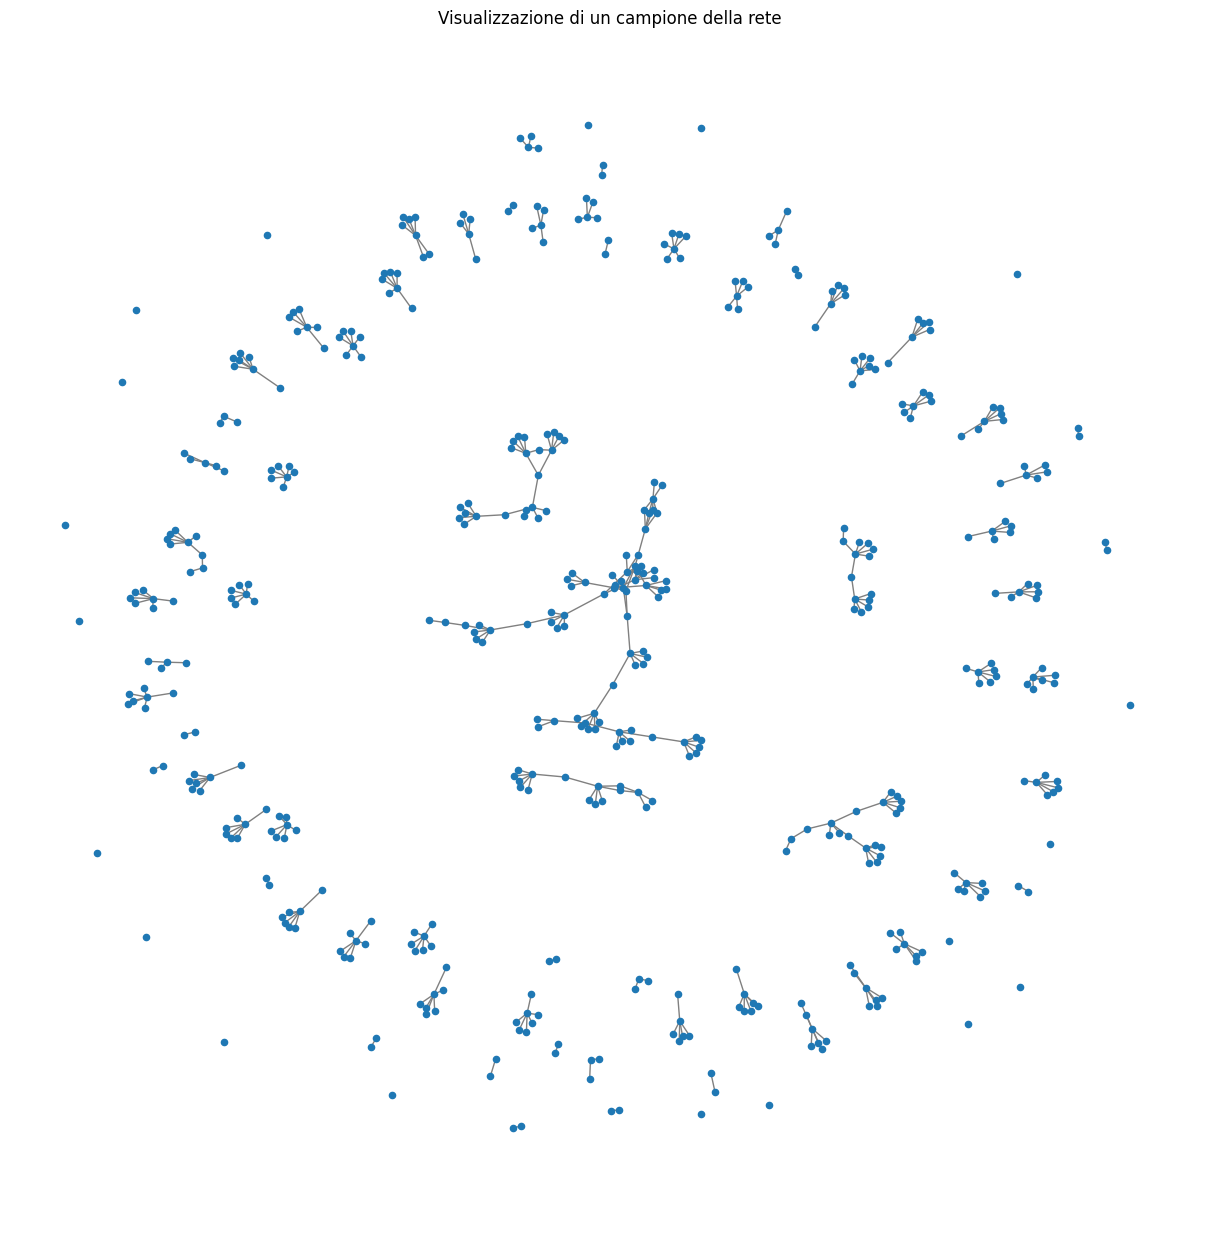

In [ ]:
# Carica il dataset
df = pd.read_csv("C:/Users/mauro/Desktop/Nuova cartella/disney_plus_titles.csv")

# Crea un grafo vuoto
G = nx.Graph()

# Aggiungi i nodi e gli archi
for index, row in df.iterrows():
    movie = row['title']  # Usa la colonna 'title' per i titoli
    if isinstance(row['cast'], str):  # Assicurati che 'cast' sia una stringa
        actors = row['cast'].split(',')  # Usa la colonna 'cast' per gli attori, separati da virgola
    else:
        actors = []  # Se 'cast' non è valido, salta questa riga
    
    # Aggiungi il film come nodo
    G.add_node(movie)
    
    # Aggiungi gli attori come nodi e collega con il film
    for actor in actors:
        actor = actor.strip()  # Rimuovi eventuali spazi vuoti
        G.add_node(actor)
        G.add_edge(movie, actor)  # Collega l'attore al film

# Creare un campione del grafo con i primi 100 nodi
sampled_graph = G.subgraph(list(G.nodes)[:500])

# Disegnare la sottorete
plt.figure(figsize=(12, 12))
nx.draw(sampled_graph, node_size=20, edge_color='gray', with_labels=False)
plt.title("Visualizzazione di un campione della rete")
plt.show()

## Densità della rete

In [ ]:
# Densità della rete
density = nx.density(G)
print(f"Densità della rete: {density:.4f}")


Numero di nodi: 5204
Numero di archi: 5899
Densità della rete: 0.0004


## Analisi della centralità

In [ ]:
# Centralità per grado
degree_centrality = nx.degree_centrality(G)

# Centralità di betweenness
betweenness_centrality = nx.betweenness_centrality(G)

# Centralità di closeness
closeness_centrality = nx.closeness_centrality(G)

# Centralità di eigenvector
eigenvector_centrality = nx.eigenvector_centrality(G)

# Visualizza i 10 nodi più centrali per ogni tipo di centralità
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 nodi per grado di centralità:", top_degree)
print("Top 10 nodi per centralità di betweenness:", top_betweenness)
print("Top 10 nodi per centralità di closeness:", top_closeness)
print("Top 10 nodi per centralità di eigenvector:", top_eigenvector)


Top 10 nodi per grado di centralità: [('Jim Cummings', 0.006342494714587738), ('Walt Disney', 0.003843936190659235), ('Larry the Cable Guy', 0.003651739381126273), ('Bill Farmer', 0.0034595425715933112), ('Tress MacNeille', 0.003075148952527388), ('Corey Burton', 0.003075148952527388), ('Keith Ferguson', 0.003075148952527388), ('Bob Peterson', 0.002882952142994426), ('Jeff Bennett', 0.002882952142994426), ('Pinto Colvig', 0.002882952142994426)]
Top 10 nodi per centralità di betweenness: [('Jim Cummings', 0.07957603245372814), ('Jeff Bennett', 0.0397827680351294), ('Corey Burton', 0.03245329171157334), ('Gnomeo & Juliet', 0.03244923501761272), ('Wallace Shawn', 0.030829810170581295), ('Russi Taylor', 0.026960275584998875), ('Brenda Song', 0.025448745971132797), ('Get a Horse!', 0.025370014460114228), ('Stephen Tobolowsky', 0.024616023110052503), ('Raven-Symoné', 0.024592425678599268)]
Top 10 nodi per centralità di closeness: [('Jim Cummings', 0.10228226326393323), ('Jeff Bennett', 0.097

## Analisi della struttura del grafo

In [ ]:
# Assumiamo che G sia il tuo grafo

# Verifica se il grafo è connesso
if nx.is_connected(G):
    # Se il grafo è connesso, calcola il diametro e la distanza media
    diameter = nx.diameter(G)
    print(f"Diametro della rete: {diameter}")

    avg_shortest_path_length = nx.average_shortest_path_length(G)
    print(f"Distanza media tra i nodi: {avg_shortest_path_length}")

else:
    # Se il grafo non è connesso, calcola per ogni componente connessa separatamente
    components = list(nx.connected_components(G))
    print(f"Numero di componenti connesse: {len(components)}")

    for i, component in enumerate(components):
        subgraph = G.subgraph(component)
        
        # Calcola il diametro per ogni componente
        component_diameter = nx.diameter(subgraph)
        print(f"Diametro del componente {i+1}: {component_diameter}")
        
        # Calcola la distanza media per ogni componente
        if len(component) > 1:  # Evita errore per componenti con un solo nodo
            component_avg_shortest_path_length = nx.average_shortest_path_length(subgraph)
            print(f"Distanza media tra i nodi nel componente {i+1}: {component_avg_shortest_path_length}")
        else:
            print(f"Componente {i+1} con un solo nodo, nessuna distanza media.")


Numero di componenti connesse: 474
Diametro del componente 1: 32
Distanza media tra i nodi nel componente 1: 11.182517077212625
Diametro del componente 2: 2
Distanza media tra i nodi nel componente 2: 1.6
Diametro del componente 3: 2
Distanza media tra i nodi nel componente 3: 1.3333333333333333
Diametro del componente 4: 2
Distanza media tra i nodi nel componente 4: 1.7142857142857142
Diametro del componente 5: 2
Distanza media tra i nodi nel componente 5: 1.7142857142857142
Diametro del componente 6: 0
Componente 6 con un solo nodo, nessuna distanza media.
Diametro del componente 7: 2
Distanza media tra i nodi nel componente 7: 1.3333333333333333
Diametro del componente 8: 1
Distanza media tra i nodi nel componente 8: 1.0
Diametro del componente 9: 0
Componente 9 con un solo nodo, nessuna distanza media.
Diametro del componente 10: 2
Distanza media tra i nodi nel componente 10: 1.7142857142857142
Diametro del componente 11: 4
Distanza media tra i nodi nel componente 11: 2.50909090909

## Analisi della comunità

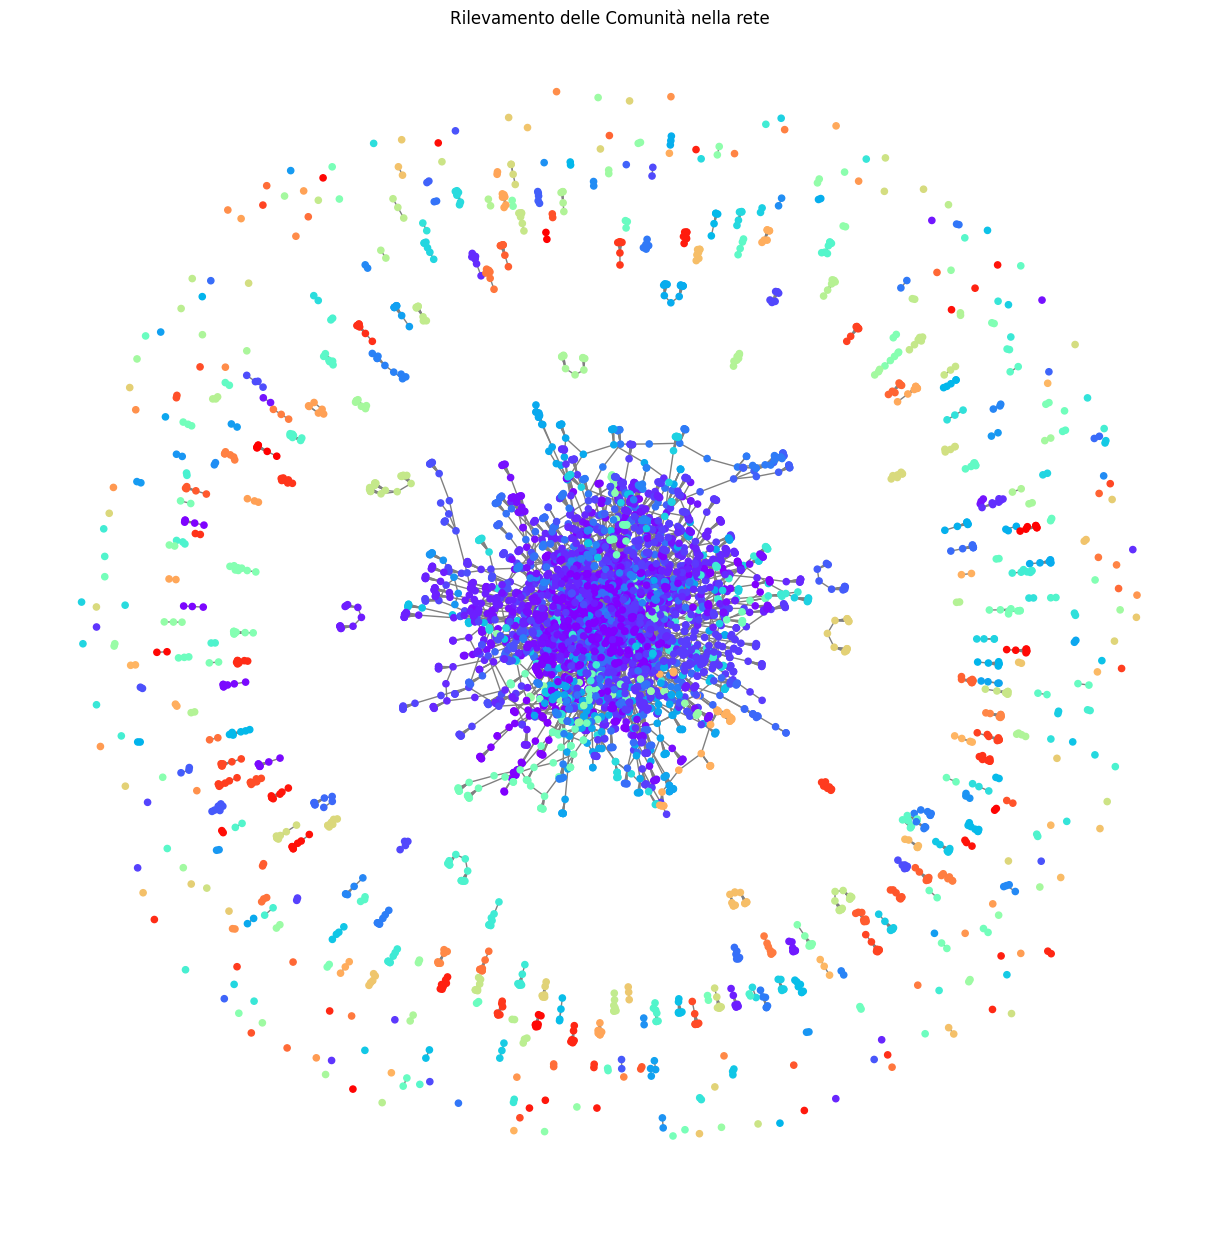

In [ ]:
# Rilevamento delle comunità con l'algoritmo Louvain
partition = community_louvain.best_partition(G)

# Aggiungi il colore della comunità come attributo ai nodi
community_colors = [partition[node] for node in G.nodes()]

# Disegna il grafo con i colori delle comunità
plt.figure(figsize=(12, 12))
nx.draw(G, node_size=20, edge_color='gray', with_labels=False, node_color=community_colors, cmap=plt.cm.rainbow)
plt.title("Rilevamento delle Comunità nella rete")
plt.show()
